In [1]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 16.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      

In [2]:
!pip install TensorFlow==2.15.0
!pip install tensorflow-decision-forests==1.8.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 65.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
      Successfully uninstalled ml-dtypes-0.3.2
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
  Attempting uninstall: TensorFlow
    Found existing installation: tensorflow 2.16.2
    Uninstalling tensorflow-2.16.2:
      Successfully uninstalled tensorflow-2.16.2
ERROR: pip's dependency

In [3]:
import tensorflowjs as tfjs
print(tfjs.__version__)

4.20.0


In [ ]:
# i = []
# while True:
#   i.append(i)

import package

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dropout, Dense, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import cv2
import numpy as np
import pickle
import pandas as pd
import glob

load dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import zipfile
import os

# Path ke file ZIP di Google Drive
zip_path = '/content/drive/My Drive/combined_dataset.zip'

# Direktori tujuan untuk ekstraksi
extract_path = '/content/combined_dataset/'

# Ekstrak file ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List files di direktori ekstraksi untuk memastikan ekstraksi berhasil
os.listdir(extract_path)


['Healthy', 'LeafBlast', 'Hispa', 'BrownSpot']

In [13]:
BATCH_SIZE = 32
IMAGE_SIZE = 224

In [14]:
dataset = image_dataset_from_directory(
    "/content/combined_dataset",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2060 files belonging to 4 classes.


In [15]:
class_names = dataset.class_names
class_names

['BrownSpot', 'Healthy', 'Hispa', 'LeafBlast']

image preprocessing

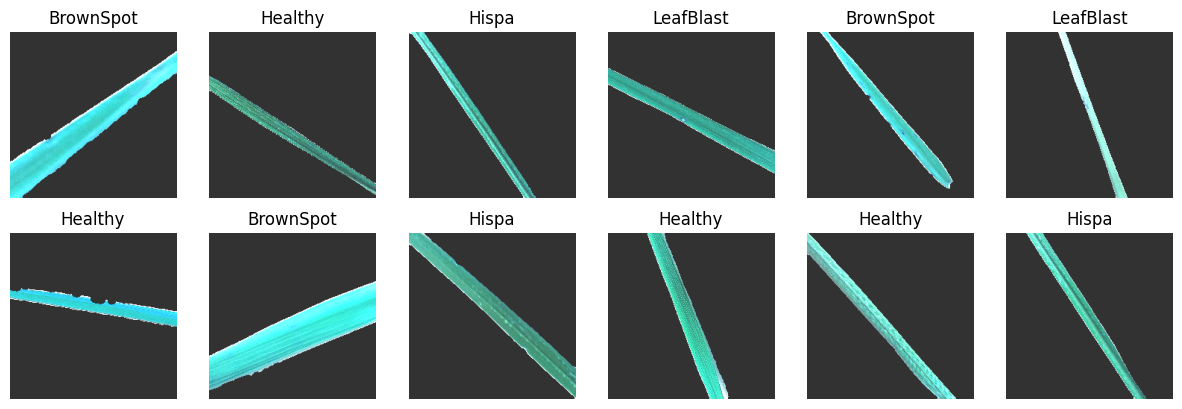

In [16]:
plt.figure(figsize=(15, 10))
for img, label in dataset.take(1):
    img_np = img.numpy()  # Convert tf.Tensor to numpy array

    for i in range(12):
        ax = plt.subplot(4, 6, i + 1)

        img_np_i = img_np[i].astype("uint8")
        blur_img = cv2.GaussianBlur(img_np_i, (5, 5), 0)
        hsv_img = cv2.cvtColor(blur_img, cv2.COLOR_RGB2HSV)

        lower_green = (25, 40, 40)
        upper_green = (100, 255, 255)

        mask = cv2.inRange(hsv_img, lower_green, upper_green)

        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

        green_objects = cv2.bitwise_and(img_np_i, img_np_i, mask=mask)
        green_objects_rgb = cv2.cvtColor(green_objects, cv2.COLOR_BGR2RGB)
        green_objects_rgb = cv2.convertScaleAbs(green_objects_rgb, alpha=1.5, beta=50)

        plt.imshow(green_objects_rgb)
        plt.title(class_names[label[i].numpy()])  # Convert label to numpy scalar
        plt.axis("off")

plt.show()

In [17]:
# Function to convert labels to one-hot encoding
def one_hot_encode(image, label):
    label = tf.one_hot(label, depth=len(class_names))
    return image, label

# Apply one-hot encoding to the dataset
dataset = dataset.map(one_hot_encode)

Image 1 one-hot encoded label: [0. 0. 1. 0.]
Image 2 one-hot encoded label: [0. 1. 0. 0.]
Image 3 one-hot encoded label: [0. 0. 1. 0.]
Image 4 one-hot encoded label: [0. 1. 0. 0.]
Image 5 one-hot encoded label: [0. 1. 0. 0.]
Image 6 one-hot encoded label: [0. 0. 1. 0.]
Image 7 one-hot encoded label: [0. 0. 1. 0.]
Image 8 one-hot encoded label: [0. 0. 0. 1.]
Image 9 one-hot encoded label: [0. 0. 0. 1.]
Image 10 one-hot encoded label: [0. 0. 1. 0.]
Image 11 one-hot encoded label: [0. 1. 0. 0.]
Image 12 one-hot encoded label: [0. 1. 0. 0.]


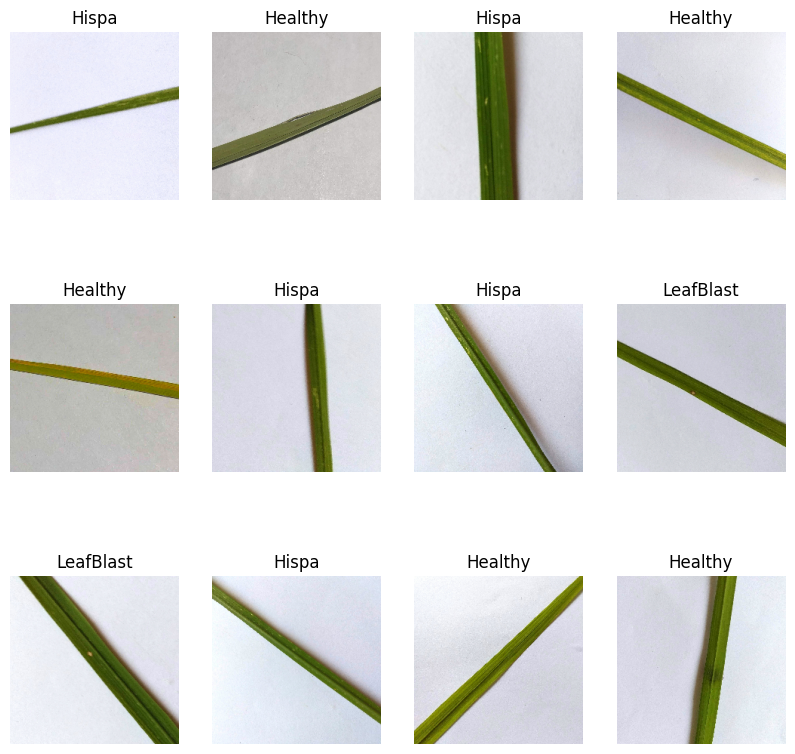

In [18]:
# Displaying sample images after preprocessing and showing one-hot encoded labels
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        label_index = np.argmax(labels[i].numpy())
        plt.title(class_names[label_index])
        plt.axis("off")
        print(f"Image {i+1} one-hot encoded label: {labels[i].numpy()}")
plt.show()

split data

In [19]:
# Function to partition the dataset
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

# Partition the dataset
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

data augmentasi

In [49]:
# Data augmentation function
def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)
    image = tf.image.random_saturation(image, lower=0.9, upper=1.1)
    image = tf.image.random_hue(image, max_delta=0.1)
    return image, label

In [50]:
# Apply data augmentation to the training dataset
train_ds = train_ds.map(augment, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

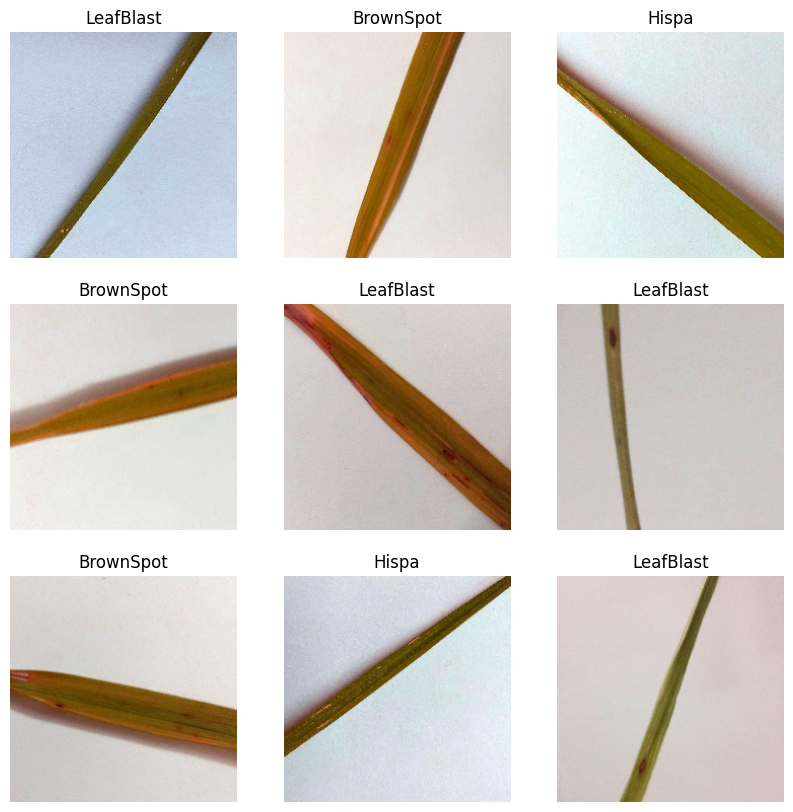

In [51]:
# Function to get the class index from one-hot encoded labels
def get_class_index(one_hot_encoded_label):
    return tf.argmax(one_hot_encoded_label).numpy()

# Display some augmented images
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        class_index = get_class_index(labels[i])
        plt.title(class_names[class_index])
        plt.axis("off")
plt.show()

model

In [52]:
import keras
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.applications.efficientnet_v2 import EfficientNetV2M

In [53]:
# Load the pre-trained ResNet50 model without the top layer
base_model = EfficientNetV2M(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.summary()

Model: "efficientnetv2-m"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['input_2[0][0]']             
                                                                                                  
 stem_conv (Conv2D)          (None, 112, 112, 24)         648       ['rescaling_1[0][0]']         
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 112, 112, 24)         96        ['stem_conv[0][0]']           
 n)                                                                                

In [54]:
# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
outputs = Dense(len(class_names), activation='softmax')(x)

# Combine base model and custom head
model = Model(inputs=base_model.input, outputs=outputs)

In [ ]:
# # Define CNN model
# inputs = Input(shape=(224, 224, 3))
# x = Conv2D(32, (3, 3), activation='relu')(inputs)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Conv2D(64, (3, 3), activation='relu')(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Conv2D(128, (3, 3), activation='relu')(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Flatten()(x)
# x = Dense(256, activation='relu')(x)
# x = BatchNormalization()(x)
# x = Dropout(0.5)(x)
# outputs = Dense(len(class_names), activation='softmax')(x)

In [ ]:
# # Create model
# model = Model(inputs=inputs, outputs=outputs)

# # Compile model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Define ReduceLROnPlateau callback
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# # Train the model
# history = model.fit(
#     train_ds,
#     validation_data=val_ds,
#     epochs=50,
#     callbacks=[reduce_lr]
# )

In [55]:
# Freeze layers in base model
for layer in base_model.layers:
    layer.trainable = False

In [59]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,
    callbacks=[reduce_lr]
)

Epoch 1/100
52/52 [==============================] - 41s 329ms/step - loss: 0.7336 - accuracy: 0.6965 - val_loss: 0.7441 - val_accuracy: 0.7135 - lr: 0.0010
Epoch 2/100
52/52 [==============================] - 13s 241ms/step - loss: 0.7584 - accuracy: 0.6873 - val_loss: 0.7550 - val_accuracy: 0.7135 - lr: 0.0010
Epoch 3/100
52/52 [==============================] - 12s 240ms/step - loss: 0.7405 - accuracy: 0.6953 - val_loss: 0.7110 - val_accuracy: 0.7083 - lr: 0.0010
Epoch 4/100
52/52 [==============================] - 12s 238ms/step - loss: 0.7637 - accuracy: 0.6776 - val_loss: 0.7179 - val_accuracy: 0.6979 - lr: 0.0010
Epoch 5/100
52/52 [==============================] - 12s 238ms/step - loss: 0.7593 - accuracy: 0.6825 - val_loss: 0.7413 - val_accuracy: 0.7240 - lr: 0.0010
Epoch 6/100
52/52 [==============================] - 12s 243ms/step - loss: 0.7191 - accuracy: 0.6995 - val_loss: 0.7903 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 7/100
52/52 [==============================] - 12s 2

In [60]:
# Clear the session
tf.keras.backend.clear_session()

In [61]:
scores = model.evaluate(test_ds)
scores

7/7 [==============================] - 95s 221ms/step - loss: 0.7581 - accuracy: 0.7321


[0.7581400275230408, 0.7321428656578064]

In [62]:
history
history.params
history.history.keys()
type(history.history['loss'])
len(history.history['loss'])
history.history['loss'][:5] # show loss for first 5 epochs

[0.7335683107376099,
 0.7583662867546082,
 0.7405402660369873,
 0.763689398765564,
 0.7593140006065369]

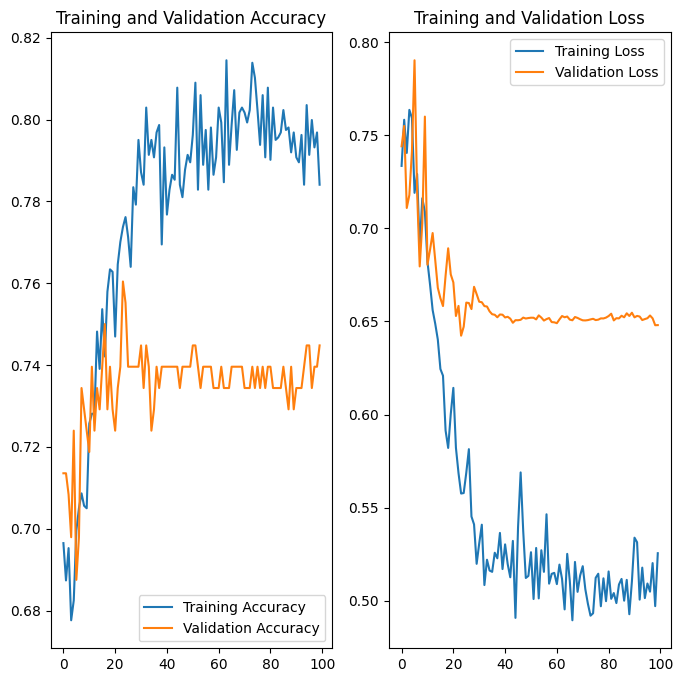

In [63]:
# Assuming you have the history object from the model.fit call
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs actually completed
epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

Run prediction on a sample image

First image to predict


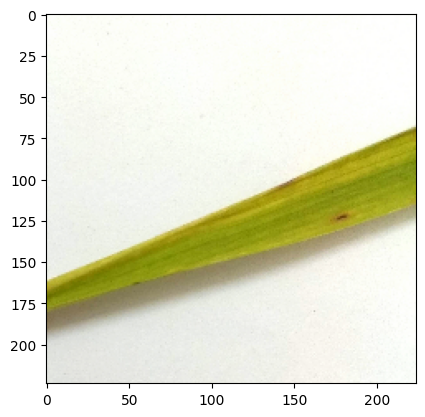

Actual label: BrownSpot
1/1 [==============================] - 4s 4s/step
Predicted label: BrownSpot


In [64]:
import numpy as np
import matplotlib.pyplot as plt

for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("First image to predict")
    plt.imshow(first_image)
    plt.show()

    print("Actual label:", class_names[np.argmax(first_label)])

    batch_prediction = model.predict(images_batch)
    print("Predicted label:", class_names[np.argmax(batch_prediction[0])])


Write a function for inference

In [73]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [72]:
from sklearn.metrics import classification_report
import numpy as np

true_labels = []
predicted_labels = []

for images_batch, labels_batch in test_ds:
    true_labels.extend(np.argmax(labels_batch, axis=1))  # Ambil indeks dari label sebenarnya
    batch_prediction = model.predict(images_batch)
    predicted_labels.extend(np.argmax(batch_prediction, axis=1))  # Ambil indeks dari label yang diprediksi

# Buat laporan klasifikasi
class_report = classification_report(true_labels, predicted_labels, target_names=class_names)

print("Classification Report:\n", class_report)


1/1 [==============================] - 0s 103ms/step
Classification Report:
               precision    recall  f1-score   support

   BrownSpot       0.91      0.70      0.79        60
     Healthy       0.71      0.67      0.69        61
       Hispa       0.57      0.77      0.65        48
   LeafBlast       0.80      0.80      0.80        55

    accuracy                           0.73       224
   macro avg       0.75      0.74      0.73       224
weighted avg       0.76      0.73      0.74       224



convert model

In [ ]:
tfjs.converters.save_keras_model(model, 'models')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!ls
from google.colab import files

combined_dataset  drive  models  sample_data


In [ ]:
files.download('models')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, 'models')

import shutil
# Lokasi folder yang ingin Anda kompres
folder_path = '/content/models'

# Lokasi tempat menyimpan file ZIP
zip_path = '/content/models.zip'

# Kompres folder menjadi file ZIP
shutil.make_archive('/content/models', 'zip', folder_path)

# Lokasi file ZIP yang ingin diunggah
zip_file = '/content/models.zip'
